# Predicting Migration Rate

 The objective of this project is to develop a machine learning model that can accurately predict migration rates based on various socio-economic and demographic factors.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
dataframe = pd.read_csv('migration_nz.csv')

# Data Exploration

Data exploration is an essential step in the data analysis process. It involves examining and understanding the data to gain insights, identify patterns, and make informed decisions. 

In [4]:
dataframe.head()

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0


In [5]:
dataframe.tail()

,Measure,Country,Citizenship,Year,Value
86521,Net,Not stated,Australian Citizen,2016,80.0
86522,Net,Not stated,Total All Citizenships,2016,3177.0
86523,Net,All countries,New Zealand Citizen,2016,-1818.0
86524,Net,All countries,Australian Citizen,2016,3487.0
86525,Net,All countries,Total All Citizenships,2016,70588.0


In [6]:
dataframe.shape

(86526, 5)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86526 entries, 0 to 86525
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measure      86526 non-null  object 
 1   Country      86526 non-null  object 
 2   Citizenship  86526 non-null  object 
 3   Year         86526 non-null  int64  
 4   Value        86454 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [8]:
dataframe.columns

Index(['Measure', 'Country', 'Citizenship', 'Year', 'Value'], dtype='object')

In [9]:
dataframe['Measure'].unique()

array(['Arrivals', 'Departures', 'Net'], dtype=object)

In [10]:
print(dataframe['Measure'])

0        Arrivals
1        Arrivals
2        Arrivals
3        Arrivals
4        Arrivals
           ...   
86521         Net
86522         Net
86523         Net
86524         Net
86525         Net
Name: Measure, Length: 86526, dtype: object


In [11]:
dataframe['Measure'].replace("Arrivals", 0, inplace = True)
dataframe['Measure'].replace("Departures", 1, inplace = True)
dataframe['Measure'].replace("Net", 2, inplace = True)

In [12]:
dataframe['Measure'].value_counts()

0    28842
1    28842
2    28842
Name: Measure, dtype: int64

In [13]:
dataframe.columns

Index(['Measure', 'Country', 'Citizenship', 'Year', 'Value'], dtype='object')

In [14]:
dataframe['Country'].unique()

array(['Oceania', 'Antarctica', 'American Samoa', 'Australia',
       'Cocos Islands', 'Cook Islands', 'Christmas Island', 'Fiji',
       'Micronesia', 'Guam', 'Kiribati', 'Marshall Islands',
       'Northern Mariana Islands', 'New Caledonia', 'Norfolk Island',
       'Nauru', 'Niue', 'New Zealand', 'French Polynesia',
       'Papua New Guinea', 'Pitcairn Island', 'Palau', 'Solomon Islands',
       'French Southern Territories', 'Tokelau', 'Tonga', 'Tuvalu',
       'Vanuatu', 'Wallis and Futuna', 'Samoa', 'Asia', 'Afghanistan',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Brunei Darussalam',
       'Bhutan', 'China', 'Georgia', 'Hong Kong', 'Indonesia', 'India',
       'Japan', 'Kyrgyzstan', 'Cambodia', 'North Korea', 'South Korea',
       'Kazakhstan', 'Laos', 'Sri Lanka', 'Myanmar', 'Mongolia', 'Macau',
       'Maldives', 'Malaysia', 'Nepal', 'Philippines', 'Pakistan',
       'Singapore', 'Thailand', 'Tajikistan', 'Timor-Leste',
       'Turkmenistan', 'Taiwan', 'Uzbekistan', 'Vietn

In [16]:
dataframe['CountryID'] = pd.factorize(dataframe.Country)[0]
dataframe['CitID'] = pd.factorize(dataframe.Citizenship)[0]

In [18]:
dataframe['CountryID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

# Imputing Missing Values

In [20]:
dataframe.isnull().sum()

Measure         0
Country         0
Citizenship     0
Year            0
Value          72
CountryID       0
CitID           0
dtype: int64

In [22]:
dataframe["Value"].fillna(dataframe["Value"].median(),inplace=True)

In [23]:
dataframe.isna().sum().any()

False

In [24]:
dataframe.drop('Country', axis=1, inplace=True)
dataframe.drop('Citizenship', axis=1, inplace=True)

# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 70% for training and 30% for testing.

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
X = dataframe[['CountryID', 'Measure', 'Year', 'CitID']].values
Y = dataframe['Value'].values

In [31]:
X.shape, Y.shape

((86526, 4), (86526,))

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [33]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((60568, 4), (25958, 4), (60568,), (25958,))

# Random Forest Regressor

Random Forest Regressor is a machine learning algorithm that is based on the Random Forest ensemble method and used for regression tasks. It is an extension of the Random Forest Classifier, but instead of predicting categorical variables, it predicts continuous numeric values.

In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=70,max_features = 3,max_depth=5,n_jobs=-1)
model.fit(X_train ,Y_train)
model.score(X_test, Y_test)

0.7359188976205475

# Migration Rate

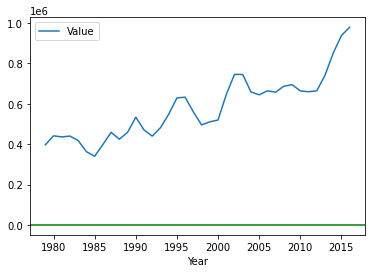

In [39]:
X = dataframe[['CountryID','Measure','Year','CitID']]
Y = dataframe['Value']
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.3, random_state=9)
grouped = dataframe.groupby(['Year']).aggregate({'Value' : 'sum'})


grouped.plot(kind='line');plt.axhline(0, color='g')
plt.show()

In [41]:
corr = dataframe.corr()

In [42]:
corr

,Measure,Year,Value,CountryID,CitID
Measure,1.000000e+00,-4.606925e-15,-0.056012,-3.683719e-17,1.847408e-16
Year,-4.606925e-15,1.000000e+00,0.019278,-5.450121e-15,2.743313e-15
Value,-5.601206e-02,1.927762e-02,1.000000,-6.157205e-03,4.596552e-02
CountryID,-3.683719e-17,-5.450121e-15,-0.006157,1.000000e+00,5.236802e-17
CitID,1.847408e-16,2.743313e-15,0.045966,5.236802e-17,1.000000e+00


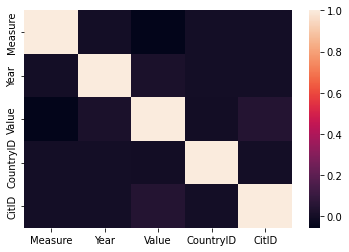

In [44]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()